- KNN: 주변 k 개의 자료의 클래스(class) 중 가장 많은 클래스로 특정 자료를 분류하는 방식
  - Training-data 자체가 모형일 뿐, 어떠한 추정 방법도 모형도 없음 -> 데이터의 분포를 표현하기 위한 파라미터(가중치, 절편 등)를 추정하지 않음
  - 매우 간단한 방법이지만 performance는 떨어지지 않음 -> GOOD!!
  - 게으른 학습, 사례 중심 학습
    - 다수결 방식, 가중합 방식(가까운 이웃의 정보에 좀 더 가중치를 부여)
  - 차원의 저주 문제: KNN 차원이 증가할수록 성능 저하가 심함 -> 공간의 크기가 기하급수적으로 증가 -> 데이터의 밀도가 급속도로 희박해짐
  - 관측치의 거리(d)로 'Minkowski' 거리를 이용 -> 1: 맨하탄 거리, 2: 유클리디언 거리
  - 탐색할 이웃 수(k)가 작을 경우: 과대적합, 클 경우: 과소적합
  - 장점
    - 학습데이터 수가 많다면 꽤 효과적인 알고리즘
    - 마할라노비스 거리와 같이 데이터의 분산을 고려할 경우, 매우 강건한 방법론
  - 단점
    - 최적 이웃의 수(k)와 어떤 거리 척도가 분석에 적합한지 불분명 -> 연구자가 임의로 선정해야 함 -> 그리드 서치로 탐색
    - 계산 시간이 오래 걸리는 한계

- KNN의 적용
  - 기계 학습의 일반적인 실습 순서
    1. 데이터셋 불러오기: seaborn 라이브러리 사용, 유명 데이터셋 지원(iris 등)
    2. 데이터셋 카테고리의 실수화
    3. 데이터 분할: 학습 데이터와 테스트 데이터
    4. (옵션) 입력 데이터의 표준화
    5. 모형 추정 혹은 사례 중심 학습
    6. 결과 분석
      - Confusion matrix로 확인


In [ ]:
# 3장  KNN
import seaborn as sns # seaborn을 불러오고 SNS로 축약함.
iris=sns.load_dataset('iris') # iris라는 변수명으로 Iris data를 download함.
print(iris.head()) # 최초의 5개의 관측치를 print

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


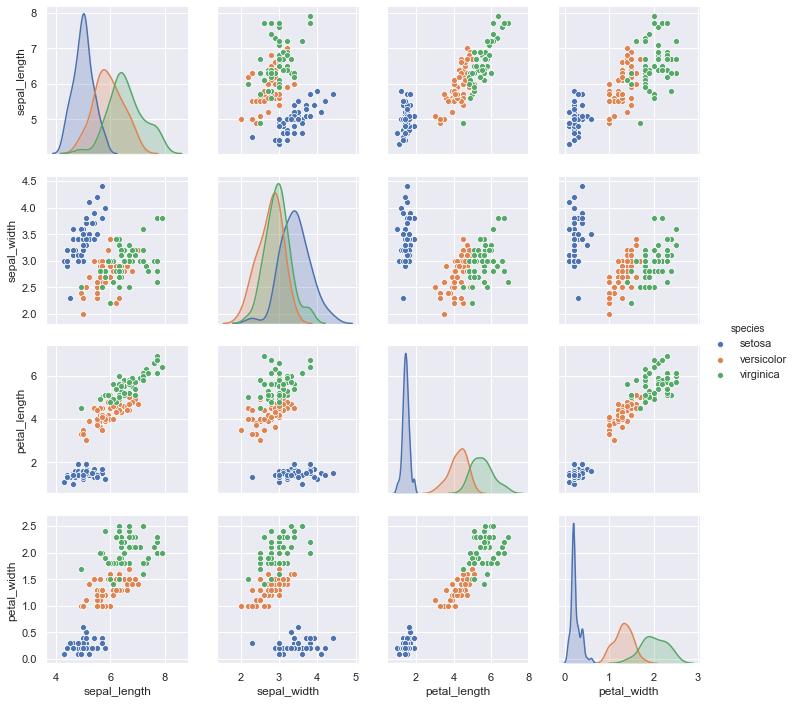

In [ ]:
import seaborn as sns # seaborn 불러옴
sns.set() # seaborn style로 그림 그리기
sns.pairplot(iris,hue='species',size=2.5) # size는 그림 크기

In [ ]:
print(iris.shape) # iris data의 행과 열의 수

X = iris.drop('species', axis=1) # 'species'열을 drop하고 input X를 정의함.
print(X.shape)

y=iris['species']               # 'species'열을 lavel y를 정의함.

(150, 5)
(150, 4)


- Seaborn 라이브러리
  - 파이썬에서 데이터 시각화를 담당하는 모듈
  - 유익한 통계 그래픽을 그리기 위한 고급 인터페이스를 제공

In [ ]:
# 카테고리의 실수화
from sklearn.preprocessing import LabelEncoder # LabelEncoder() method를 불러옴
import numpy as np # numpy를 불러옴
classle=LabelEncoder() 
y=classle.fit_transform(iris['species'].values) # species 열의 문자열은 categorical 값으로 전환
print('species labels:', np.unique(y)) # 중복되는 y 값을 하나로 정리하여 print

species labels: [0 1 2]


In [ ]:
yo=classle.inverse_transform(y) # 원래의 species 문자열로 전환
print('species:',np.unique(yo))

species: ['setosa' 'versicolor' 'virginica']


- 데이터 분할
  - 데이터 분할이란?
    - 학습 데이터와 시험 데이터가 서로 겹치지 않도록 나누는 것
    - 목적: 학습에 전혀 사용하지 않은 시험데이터에 적용하여 학습 결과의 일반화가 가능한지 알아보기 위함 

In [ ]:

from sklearn.model_selection import train_test_split  #Scikit-Learn 의 model_selection library를 train_test_split로 명명
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)   # x와 y의 data를 각각 30%, 70%의 비율로 test_set과 training_set으로 나눔
# stratify: 이 값을 target으로 지정해주면 한 쪽에 쏠려서 분배되는 것 방지
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [ ]:
## 모형 추정 및 사례중심 학습
# KNN 의 적용
from sklearn.neighbors import KNeighborsClassifier  #KNN 불러오기
knn=KNeighborsClassifier(n_neighbors=5,p=2) #5개의 인접한이웃, 거리측정기준:유클리드 -> 라이브러리 활용 능력이 중요하다!! -> 자주 접해봐야 함
knn.fit(X_train_std,y_train) #모델 fitting과정

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# 표준화 X 데이터로 예측할 경우
y_train_pred=knn.predict(X_train) #train data의 y값 예측치
y_test_pred=knn.predict(X_test)  #모델을 적용한 test data의 y값 예측치
print('Misclassified training samples: %d' %(y_train!=y_train_pred).sum()) #오분류 데이터 갯수 확인
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum()) #오분류 데이터 갯수 확인

Misclassified training samples: 2
Misclassified test samples: 1


In [ ]:
from sklearn.metrics import accuracy_score    #정확도 계산을 위한 모듈 import
print(accuracy_score(y_test,y_test_pred)) # 45개 test sample중 42개가 정확하게 분류됨.

0.9777777777777777


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)    # training data의 표준화
X_test_std=sc.transform(X_test)      # test data의 표준화

#표준화된 data의 확인
print(X_train.head()) # X_train data 최초 5개의 관측치
X_train_std[1:5,] # X_train_std data 최초 5개의 관측치

     sepal_length  sepal_width  petal_length  petal_width
33            5.5          4.2           1.4          0.2
20            5.4          3.4           1.7          0.2
115           6.4          3.2           5.3          2.3
124           6.7          3.3           5.7          2.1
35            5.0          3.2           1.2          0.2


array([[-0.55053619,  0.76918392, -1.16537974, -1.30728421],
       [ 0.65376173,  0.30368356,  0.84243039,  1.44587881],
       [ 1.0150511 ,  0.53643374,  1.0655204 ,  1.18367281],
       [-1.03225536,  0.30368356, -1.44424226, -1.30728421]])

In [ ]:
y_train_pred=knn.predict(X_train_std) #train data의 y값 예측치
y_test_pred=knn.predict(X_test_std)  #모델을 적용한 test data의 y값 예측치
print('Misclassified training samples: %d' %(y_train!=y_train_pred).sum()) #오분류 데이터 갯수 확인
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum()) #오분류 데이터 갯수 확인

Misclassified training samples: 4
Misclassified test samples: 3


In [ ]:
from sklearn.metrics import accuracy_score    #정확도 계산을 위한 모듈 import
print(accuracy_score(y_test,y_test_pred)) # 45개 test sample중 42개가 정확하게 분류됨.

0.9333333333333333


- 결과 분석
  - 성능 평가: 분류 문제는 회귀 분석과 달리 다양한 성능 평가 기준이 필요, 평가 방법마다 장단점이 존재
  - 싸이킷런에서 제공하는 분류 성능 평가 방법
    - confusion_matrix(y_true, y_pred)
    - accuracy_score(y_true, y_pred)
    - 이 2가지를 가장 많이 사용!!

- 혼합 행렬 (confusion matrix): 타겟의 원래 클래스와 모형이 예측한 클래스가 일치하는지는 갯수로 센 결과를 표로 나타낸 것
  - 정확도: 전체 샘플 중 맞게 예측한 샘플 수의 비율 -> (TP + TN) / (TP + TN + FP + FN)
  - 정밀도: 양성 클래스에 속한다고 예측한 샘플 중 실제로 양성 클래스에 속하는 샘플 수의 비율 -> TP / (TP + FP)
  - 재현율: 실제 양성 클래스에 속한 표본 중에 양성 클래스에 속한다고 예측한 표본의 수의 비율 -> (TP) / (TP + FN)


In [ ]:
from sklearn.metrics import confusion_matrix#  오분류표 작성을 위한 모듈 import
conf=confusion_matrix(y_true=y_test,y_pred=y_test_pred) # 대각원소가 각각 setosa, versicolor, virginica를 정확하게 분류한 갯수.
print(conf)
 # setosa는 모두 정확하게 분류되었고 versicolor는 15개 중 2개가 virginica로 오분류 되었으며 virginica는 15개 중 1개가 versicolor로 오분류됨.

[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]


In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

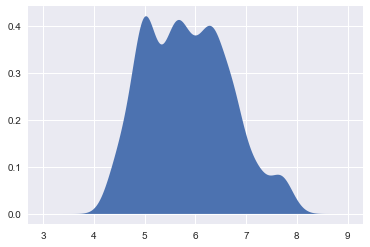

In [ ]:
# Kernel density
import matplotlib.pyplot as plt #plot module import
import numpy as np              #numpy module import
xx=X['sepal_length'].values # Iris data의 첫번째 feature
xx=xx.T.reshape(-1, 1) # reshape
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=0.2, kernel='gaussian')
kd.fit(xx)
xx_d = np.linspace(3, 9, 1000)
logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 log probability 계산
plt.fill_between(xx_d, np.exp(logprob))

- KNN 회귀 정의
  - KNN 분류와 동일, Y의 예측치 계산만 다름
  - k개 정답의 평균을 구하는 것
    - 단순 회귀: 가까운 이웃들의 단순한 평균을 구하는 방식
    - 가중 회귀: 각 이웃이 얼마나 가까이 있는지에 따라 가중 평균을 구해 거리가 가까울수록 데이터가 더 유사할 것이라 보고 가중치를 부여하는 방식

In [ ]:
## KNN 회귀 실습
# KNN 회귀를 이용한 영화 평점 예측
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors = 3, weights = "distance")
 # 여기서, distance -> 가중평균/ uniform -> 단순평균(기본값)
training_points = [[0.5, 0.2, 0.1],
                  [0.9, 0.7, 0.3],
                  [0.4, 0.5, 0.7]]
training_labels = [5.0, 6.8, 9.0]
regressor.fit(training_points, training_labels)
unknown_points = [[0.2, 0.1, 0.7],
                  [0.4, 0.7, 0.6],
                  [0.5, 0.8, 0.1]]
guesses = regressor.predict(unknown_points)
guesses  

array([7.28143288, 7.76451922, 6.8457845 ])